# Summarize the Manually Labeled Paragraphs
We can summarize the results from the extracted paragraphs that we've manually labeled.

We have four completed "label" spreadsheets (.ods files) in the `data/processed/labels/labels_complete_for_viz` folder. We'll visualize the result from these.

First, we'll import the necessary packages.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization.visualize import (
    summarize_final_label_file, 
    plot_percent_articles_by_publisher, 
    plot_individual_publisher
    )

%load_ext autoreload
%autoreload 2

The four label files correspond to different publication venues. They are:
* [arXiv](https://arxiv.org/) - `labels_1.ods` - 100 articles were randomly sampled
* [PHM Conference](https://papers.phmsociety.org/index.php/phmconf/issue/archive) - `labels_phm_97_0-150.ods` - 150 articles were randomly sampled
* [Mechanical Systems and Signal Processing](https://www.sciencedirect.com/journal/mechanical-systems-and-signal-processing) (MSSP) - `labels_mssp_99_0-100.ods` - 100 articles were randomly sampled
* [Energies](https://www.mdpi.com/journal/energies) `labels_energies_98_0-150.ods` - 150 articles were randomly sampled

The sampling was between the years of 2015 and 2021.

We will load one of the label files.

In [2]:
# set paths
proj_dir = Path().cwd().parent
path_label_dir = proj_dir / "data/processed/labels/labels_complete_for_viz"

# load arxiv label file
df_arxiv = pd.read_excel(
    path_label_dir / "labels_1.ods",
    parse_dates=["update_date"],
    engine="odf",
)

df_arxiv.head()

,id,pattern,token_count,update_date,label,para
0,1401.8008,"code, package, code available, github, code pa...",56,2022-04-27,2.0,So we can solve the dual comparison problem (1...
1,1401.8008,data,103,2022-05-13,0.0,Comparison data also results when considering ...
2,1401.8008,data,11,2022-05-13,0.0,4. Comparison to SVMrank in sushi and simulate...
3,1401.8008,data,112,2022-05-13,0.0,Fig. 6. Test AUC for each model used after tra...
4,1401.8008,data,113,2022-05-13,0.0,The goal of learning to compare is to accurate...


The MSSP articles are not open-access, and therefore we could not include the paragraphs in the label file that is uploaded to github. However, the label counts are still correct.

In [3]:
# load MSSP label file
df_mssp = pd.read_excel(
    path_label_dir / "labels_mssp_99_0-100.ods",
    parse_dates=["update_date"],
    engine="odf",
)

df_mssp.tail()

,id,pattern,token_count,update_date,label,para
1468,10.1016_j.ymssp.2020.107347,data,322,NaT,NaN,dummy para
1469,10.1016_j.ymssp.2020.107347,"data available, data",200,2022-05-19,0.0,dummy para
1470,10.1016_j.ymssp.2020.107464,benchmark,220,2022-05-19,0.0,dummy para
1471,10.1016_j.ymssp.2020.107464,benchmark,295,2022-05-19,0.0,dummy para
1472,10.1016_j.ymssp.2020.107464,data,115,NaT,NaN,dummy para


We have made a convenient function, `summarize_final_label_file`, that creates useful pandas dataframes from the label files. You can inspect the function in the `visualize.py` file, [here](https://github.com/tvhahn/arxiv-code-search/blob/master/src/visualization/visualize.py).

The `sample_size` parameter is the number of articles that were originally sampled.

In [10]:
df_label_count, df_label_count_all = summarize_final_label_file(
    path_label_dir / "labels_1.ods", 
    sample_size=100, 
    publisher_name="arXiv"
    )

In [11]:
df_label_count

,label_name,label,count,percentage,publisher,sample_size
0,Data and Code Not Available,0,55,55.0,arXiv,100
1,Data or Code Publicly Available,1,45,45.0,arXiv,100


In [12]:
df_label_count_all

,label_name,label,count,percentage,publisher,sample_size
0,Data and Code Not\nPublicly Available,0,55,55.0,arXiv,100
1,Only Data\nPublicly Available,1,24,24.0,arXiv,100
2,Only Code\nPublicly Available,2,17,17.0,arXiv,100
3,Both Data and Code\nPublicly Available,3,4,4.0,arXiv,100


We can combine the `df_label` dataframes together and then produce some nice plots.

In [13]:
# prep label data
file_names_list = [
    "labels_phm_97_0-150.ods",
    "labels_energies_98_0-150.ods",
    "labels_mssp_99_0-100.ods",
    "labels_1.ods",
]

publisher_names_list = ["PHM Conf.", "Energies", "MSSP", "arXiv"]
sample_size_list = [150, 124, 100, 100]

df_all_list = []
df_list = []
for file_name, publisher, sample_size in zip(
    file_names_list, publisher_names_list, sample_size_list
):
    df, df_all = summarize_final_label_file(
        path_label_dir / file_name, sample_size, publisher
    )
    df_list.append(df)
    df_all_list.append(df_all)

df_all = pd.concat(df_all_list)
df = pd.concat(df_list)

In [15]:
df_all.head()

,label_name,label,count,percentage,publisher,sample_size
0,Data and Code Not\nPublicly Available,0,119,79.333333,PHM Conf.,150
1,Only Data\nPublicly Available,1,26,17.333333,PHM Conf.,150
2,Only Code\nPublicly Available,2,4,2.666667,PHM Conf.,150
3,Both Data and Code\nPublicly Available,3,1,0.666667,PHM Conf.,150
0,Data and Code Not\nPublicly Available,0,117,94.354839,Energies,124


In [16]:
df.head()

,label_name,label,count,percentage,publisher,sample_size
0,Data and Code Not Available,0,119,79.333333,PHM Conf.,150
1,Data or Code Publicly Available,1,31,20.666667,PHM Conf.,150
0,Data and Code Not Available,0,117,94.354839,Energies,124
1,Data or Code Publicly Available,1,7,5.645161,Energies,124
0,Data and Code Not Available,0,92,92.000000,MSSP,100


Plot by publication venue.

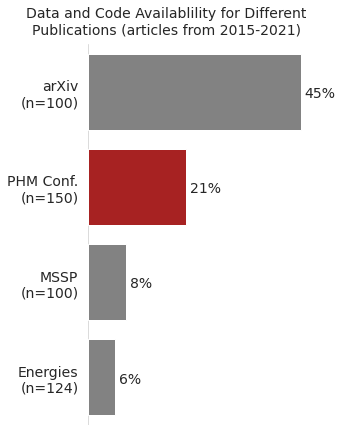

In [19]:
# make sure the styling of the plots is consistent
sns.set(font_scale=1.0, style="whitegrid", font="DejaVu Sans")

plot_percent_articles_by_publisher(
    df,
    title="Data and Code Availablility for Different\nPublications (articles from 2015-2021)",
)

Plot the distribution of the data for the PHM conference and the others.

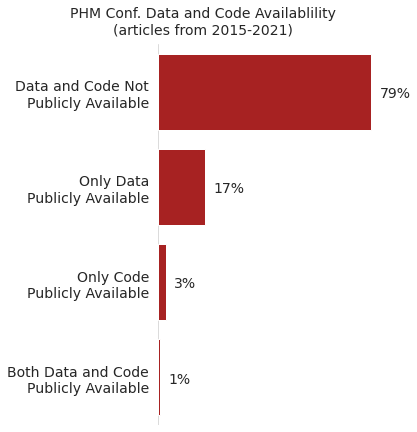

In [20]:
plot_individual_publisher(
    df_all,
    publisher_name="PHM Conf.",
    title="PHM Conf. Data and Code Availablility\n(articles from 2015-2021)",
    bar_color="#bd0c0c", # red-ish color
)

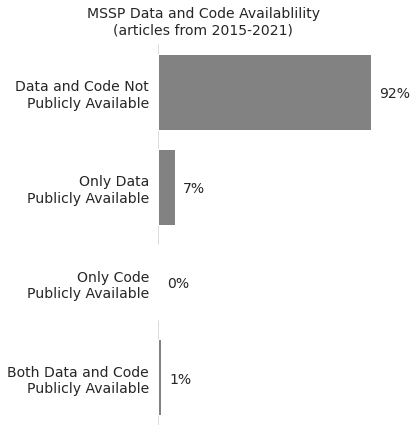

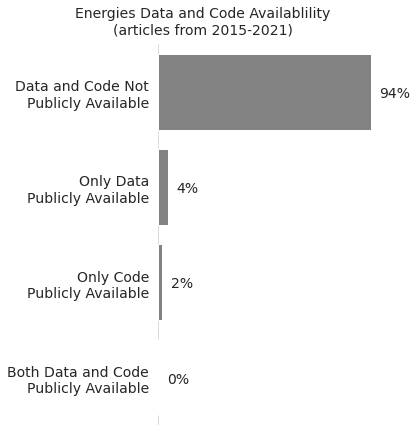

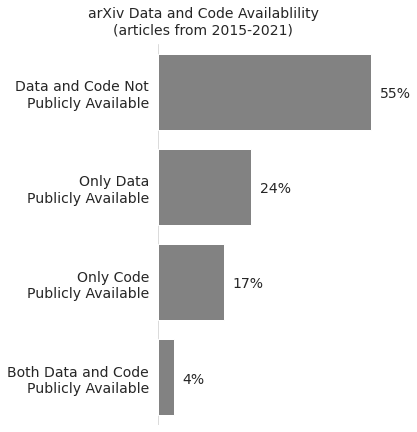

In [21]:
# MSSP
plot_individual_publisher(
    df_all,
    publisher_name="MSSP",
    title="MSSP Data and Code Availablility\n(articles from 2015-2021)",
)

# Energies
plot_individual_publisher(
    df_all,
    publisher_name="Energies",
    title="Energies Data and Code Availablility\n(articles from 2015-2021)",
)

# arXiv
plot_individual_publisher(
    df_all,
    publisher_name="arXiv",
    title="arXiv Data and Code Availablility\n(articles from 2015-2021)",
)